### *Distribution of Categorical and Continuous Variables*

#### Introduction
---
*Income inequality is a critical issue affecting many societies globally. The *`Adult Census Income`* dataset, also known as the *Census Income* dataset, was originally collected by the U.S. Census Bureau. It contains demographic information about individuals from the United States and is primarily used for predicting whether an individual's income exceeds $50K/year based on various attributes. The data reflects socio-economic trends and includes individuals from different regions across the U.S.*

#### *Dataset Overview*

The *Adult* dataset contains 48,842 instances and 15 attributes, including both categorical and continuous variables.

#####  Key attributes include:

- *Age*
- *Workclass*
- *Education*
- *Occupation*
- *Hours per week*

- *Native country*
- *Income* (target variable)

*These attributes represent key socio-economic characteristics such as education, occupation, marital status, and work hours, which are used to predict income levels,and other demographic factors.*

---
#### Aim of the Project

*The goal of this project is to visualize the distribution of various variables in the *Adult* dataset*:

-* **Bar charts and piechart** to visualize the distribution of categorical variables like *gender* and * education*.
- **Histograms** to show the distribution of continuous variables like *age* *

*These visualizations will help analyze the representation of categories and the spread, central tendencies, and ranges of these variables, providing insights into demographic and working patterns.*



#### *Improt  libraries*

In [540]:
#type:ignore 
import pandas  as pd                    
import numpy as np  

import seaborn as sns                 
import plotly.express as px
import matplotlib.pyplot as plt  


import warnings                        
warnings.filterwarnings("ignore")      # Ignore all warnings
from scipy import stats                # Statistical tests and functions

### *Load the dataset*

In [541]:
Adult=pd.read_csv("Adult_data.csv")
Adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### *Data Cleaning*

In [542]:
Adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### *Observation*
- *The dataset now contains 48842 entries and 15 columns .Where 6 numerical columns (int64) and 9 categorical columns (object).*

###  *Data Cleaning and Preprocessing*

#### *Handling missing values*

In [543]:
Adult.isnull().sum().any()

False

#### *Checking for  duplicates*

In [544]:
Adult.duplicated().sum()

52

#### *Remove duplicates*

In [545]:
Adult=Adult.drop_duplicates()
Adult.duplicated().sum()

0

#### *Selecting a Subset of Columns from the Dataset*


---
##### *Reason for Taking a Subset of Columns*

- *The decision to take a subset of columns from the original dataset is driven by the aim of the project, which focuses on visualizing the distributions of categorical variables and contnious variables*

In [546]:
# Keep only the relevant columns
subset_Adults = Adult[['age','education',  'marital-status', 'occupation', 'gender', 'income']]

# Display the first few rows of the reduced dataset to check
subset_Adults.head()

,age,education,marital-status,occupation,gender,income
0,25,11th,Never-married,Machine-op-inspct,Male,<=50K
1,38,HS-grad,Married-civ-spouse,Farming-fishing,Male,<=50K
2,28,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,>50K
3,44,Some-college,Married-civ-spouse,Machine-op-inspct,Male,>50K
4,18,Some-college,Never-married,?,Female,<=50K


#### *Let's deive to Expository data Anaylisis*

### *Descriptive Stastics*


In [547]:
subset_Adults.describe()

,age
count,48790.000000
mean,38.652798
std,13.708493
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


### *Overall Interpretation of Age Statistics:*
---
- *The age distribution in the dataset shows that the majority of individuals are in their late 30s, with an average age of approximately 38.65 years. The age range is wide, spanning from a minimum of 17 years to a maximum of 90 years. Most individuals are concentrated between the ages of 28 and 48, as indicated by the 25th and 75th percentiles. The relatively high standard deviation (13.71) suggests a moderate variation in age across the dataset. The dataset represents a diverse age range, with a larger proportion of individuals in their working years, particularly in the late 20s to 40s, and fewer individuals in older age groups.*

---


#### *Visualization : Distribution of categorical*

### *Bar chart for gender  distribution*

In [548]:
# Create a new column with the count of each 'gender' category
gender_counts = subset_Adults['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
gender_counts

,gender,count
0,Male,32614
1,Female,16176


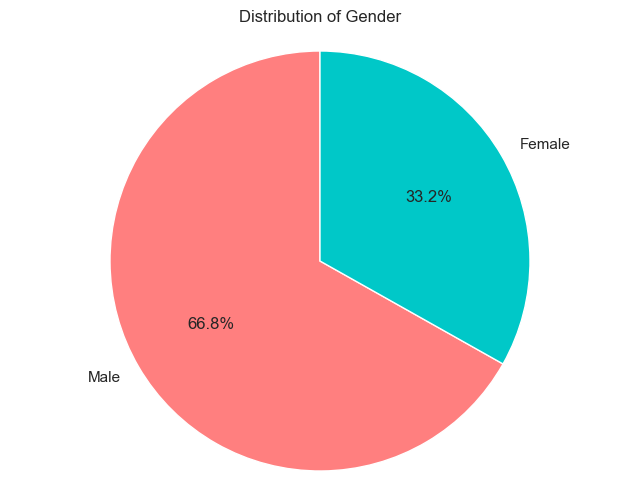

In [549]:
# Create the pie chart for 'gender' distribution
plt.figure(figsize=(8, 6))
colors = ['#FF7F7F', '#00C8C8']  # Colors for each slice
plt.pie(
    gender_counts['count'], 
    labels=gender_counts['gender'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
# Add a title
plt.title('Distribution of Gender')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


### *Key Observations from the Gender Distribution Chart*
---
*The pie chart for the *'gender'* distribution in the dataset reveals the following:*

- *There are **32,614 males** (approximately **66%**) and **16,176 females** (approximately **34%**) in the dataset. This indicates that the dataset has a higher representation of males compared to females, with males making up a little over two-thirds of the sample.*
  
- *The bar chart visually reinforces this imbalance in gender representation, showing a more prominent bar for males compared to females.*
---

### *Bar chart for gender  distribution*

#### *Interactive visulazation*

In [550]:
import plotly.express as px
# Create the interactive bar chart for 'gender' distribution with distinct colors
fig = px.bar(
    gender_counts,
    x='gender',  # Corrected to use 'gender'
    y='count',
    title='Distribution of Gender',
    labels={'gender': 'Gender', 'count': 'Count'},
    color='gender',  # Color by 'gender' to apply different colors to each bar
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a color sequence with distinct colors
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    template="plotly_white"
)

# Show the interactive plot
fig.show()


### *Bar chart for `education` distribution*

In [551]:
# Create a new column with the count of each 'education' category
educational_counts = subset_Adults['education'].value_counts().reset_index()
educational_counts.columns = ['education', 'count']

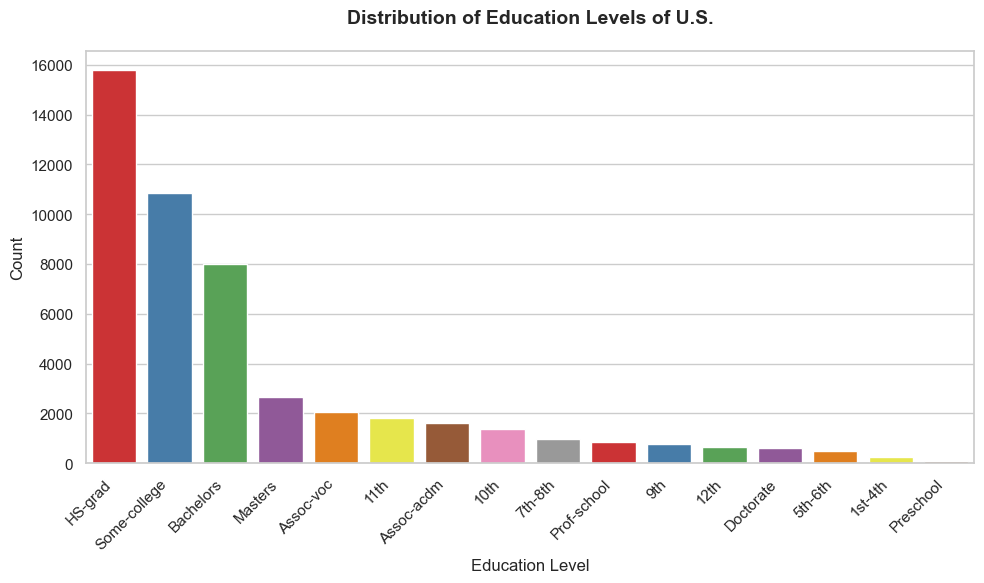

In [552]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot for 'education' distribution using Seaborn
sns.barplot(
    x='education', 
    y='count', 
    data=educational_counts, 
    palette='Set1'
)

# Add titles and labels
plt.title('Distribution of Education Levels of U.S.', fontsize=14, weight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### *Interpretation from the Education Distribution Chart*
---
*The bar chart for the `'education'` distribution in the dataset reveals the following:*

- *HS-Grad Dominance*: *The tallest bar corresponds to "HS-grad" (high school graduates), with* **15,770** *individuals, indicating that this is the most common educational attainment in the dataset.*

- *Decreasing Trend*: *As we move from higher education levels to lower ones, the bar heights generally decrease. This suggests that fewer individuals have advanced degrees compared to high school diplomas.*

- *Notable Exceptions*: *There are a few exceptions to the decreasing trend. For example, "Some-college" has a higher count* (**10,863**) *than "Bachelors"* (**8,013**) *and "Masters"* (**2,656**). *This might indicate that many individuals start college but do not complete a degree.*

### *Possible Interpretations*

- *Population Demographics*: *The dataset might reflect a population where a large proportion of individuals have completed high school but haven't pursued further education.*
  
---


In [553]:
# Create the interactive bar chart for 'education' distribution with distinct colors
fig = px.bar(
    educational_counts,
    x='education',
    y='count',
    title='Distribution of Education Levels of U.S.',
    labels={'education': 'Education Level', 'count': 'Count'},
    color='education',  # Color by 'education' to apply different colors to each bar
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a color sequence with distinct colors
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Education Level",
    yaxis_title="Count",
    template="plotly_white",
    xaxis_tickangle=-45  # Tilt x-axis labels for better readability
)

# Show the interactive plot
fig.show()


### *Visualization : Distribution of contiouns*

### *Histogram  for `Age` of the population* 

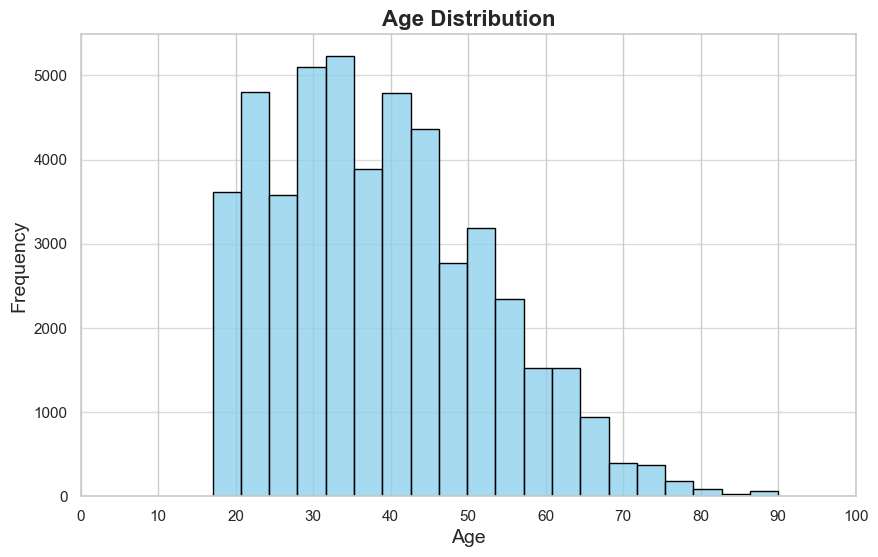

In [554]:
# Set the style for Seaborn for a more polished look
sns.set(style="whitegrid")

# Create the histogram for 'age' distribution using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(subset_Adults['age'], bins=20, kde=False, color='skyblue', edgecolor='black')

# Add titles and labels with a larger font for clarity
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(True, axis='y', linestyle='-', alpha=0.7)

# Customize x-axis ticks for better presentation
plt.xticks(range(0, 101, 10))

# Show the plot
plt.show()


### *Interpretation of Histogram for Age Distribution*
---

*The histogram of the age distribution reveals several key trends:*

- **The largest populations**: The most populous age groups are **30-40** and **20-25**, indicating that the dataset represents a young and active workforce. These age groups are typically in their prime working years, reflecting a productive segment of the population.*

- **Middle-age decline**: *As we move from the 40-50 to 50-60 age groups, there is a steady decline in the number of individuals. This suggests a gradual reduction in the workforce as people approach retirement, or it could reflect life stages with changing priorities or employment patterns.*

- **Older age groups**: *A significant reduction in numbers occurs in the 60+ age brackets, with the largest drops seen after the 70-year mark. This reflects the natural aging process, with fewer individuals remaining in the workforce or in the dataset as age increases.*

- **The smallest age groups**: *The **80-90** and **90+** age groups are the least populous. This is in line with the general expectation of a smaller population in these age ranges due to the natural limitations of lifespan.*

### *Key Observations*:

- **Dominance of younger and middle-aged groups**: *The age distribution clearly shows a dominance of younger and middle-aged individuals, likely reflective of an active workforce.*
- **Notable decline with age**: *A steady decline in the number of individuals is observed as the age increases, particularly after the 60s.*
-  **Significant reductions in senior age groups**: The most substantial decrease occurs after the 70-80 and 80+ age groups, reflecting both natural aging and potentially reduced participation in the dataset due to factors like retirement or health-related issues.*

*The histogram provides a visual representation of a population that is primarily younger, with a noticeable decrease in older individuals, indicating typical population aging trends.*

---
